In [1]:
from utils import *

In [2]:
respondents, results, cardsE, cardsB = loadData()
latestMatrices = finalMatrices()

# Statistical tests

## Normality check

In [3]:
res = []
for i in [
    'time', 'crt', 'labelClarity', 'sortDifficulty', 'concentration', 'timeAmount', 'cardQuantity',
    'bfExtra', 'bfAgree', 'bfConsc', 'bfNegEmo', 'bfOpenMind', 'informativeness'
]:
    stat, p = shapiro(respondents[i])
    res.append({
        'feature':i, 'stat':stat, 'p':p, 'p<.001': 'yes' if p < .05 else '',
        'E50': shapiro(respondents[respondents.variant=='E50'][i])[1], 
        'E30': shapiro(respondents[respondents.variant=='E30'][i])[1], 
        'B50': shapiro(respondents[respondents.variant=='B50'][i])[1], 
        'B30': shapiro(respondents[respondents.variant=='B30'][i])[1]
    })
pd.DataFrame(res)

,feature,stat,p,p<.001,E50,E30,B50,B30
0,time,0.837659,4.864709e-12,yes,4.408980e-05,1.759690e-05,0.000188,8.305934e-03
1,crt,0.815331,6.078556e-13,yes,1.105863e-05,5.147969e-06,0.000003,4.885251e-05
2,labelClarity,0.745275,2.341200e-15,yes,1.704823e-08,6.369716e-08,0.000004,4.871362e-06
3,sortDifficulty,0.871835,1.773526e-10,yes,2.029586e-06,2.733887e-05,0.000524,1.129794e-05
4,concentration,0.710321,2.188266e-16,yes,1.466450e-08,3.282316e-09,0.000003,1.641261e-06
5,timeAmount,0.751048,3.540898e-15,yes,5.784704e-09,1.801715e-06,0.000005,9.804334e-08
6,cardQuantity,0.829344,2.194195e-12,yes,5.659896e-07,5.132242e-05,0.000002,3.394407e-07
7,bfExtra,0.977227,9.573188e-03,yes,2.638616e-02,1.548693e-01,0.038848,2.546840e-01
8,bfAgree,0.950705,2.072023e-05,yes,6.793425e-03,1.446199e-01,0.089260,3.810400e-04
9,bfConsc,0.970493,1.684331e-03,yes,8.204600e-02,3.372211e-01,0.126742,7.563647e-02


## Variant differences

### E50 vs E30

In [4]:
res = []
for i in ['paired', 'similarity', 'similarityAbsolute']:
    cor, p, n = mantel(latestMatrices[i]['E50']['data'], latestMatrices[i]['E30']['data'])
    cor2, p2 = spearmanr(np.array(np.matrix(latestMatrices[i]['E50']['data']).flatten())[0], np.array(np.matrix(latestMatrices[i]['E30']['data']).flatten())[0])
    res.append({
        'feature': i, 'correlation': cor, 'p': p, 'n': n, 'correlation2': cor2, 'p2': p2
    })
pd.DataFrame(res)

,feature,correlation,p,n,correlation2,p2
0,paired,0.910707,0.001,50,0.879567,0.0
1,similarity,0.932833,0.001,50,0.888824,0.0
2,similarityAbsolute,0.910707,0.001,50,0.879567,0.0


In [5]:
my_mann(['time', 'categories', 'crt', 'labelClarity', 'sortDifficulty', 'concentration', 'timeAmount', 'cardQuantity',
    'bfExtra', 'bfAgree', 'bfConsc', 'bfNegEmo', 'bfOpenMind', 'informativeness'],
    respondents[respondents.variant=='E50'],
    respondents[respondents.variant=='E30']
)

,feature,stat,p,p<.001,n1,n2,z,effsize,m1,m2,s1,s2,med1,med2,q125,q225,q175,q275
0,time,953.5,0.140946,,40,40,1.477054,0.165140,666.450000,604.775000,274.340136,304.374810,633.000000,543.00000,477.000000,404.000000,778.250000,783.500000
1,categories,845.0,0.664922,,40,40,0.433013,0.048412,5.975000,5.825000,2.292546,2.510363,5.500000,5.50000,4.000000,4.000000,7.000000,7.000000
2,crt,915.0,0.250716,,40,40,1.106588,0.123720,1.625000,1.325000,1.233870,1.268706,1.500000,1.00000,0.750000,0.000000,3.000000,3.000000
3,labelClarity,841.0,0.644628,,40,40,0.394523,0.044109,4.625000,4.500000,0.540062,0.751068,5.000000,5.00000,4.000000,4.000000,5.000000,5.000000
4,sortDifficulty,710.5,0.355525,,40,40,-0.861214,-0.096287,3.750000,3.850000,0.776250,1.075365,4.000000,4.00000,3.000000,3.000000,4.000000,5.000000
5,concentration,766.0,0.688925,,40,40,-0.327165,-0.036578,4.575000,4.600000,0.675107,0.744208,5.000000,5.00000,4.000000,4.000000,5.000000,5.000000
6,timeAmount,857.0,0.494284,,40,40,0.548483,0.061322,3.025000,2.925000,0.530481,0.615505,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000
7,cardQuantity,815.0,0.872708,,40,40,0.144338,0.016137,3.075000,3.050000,0.615505,0.749359,3.000000,3.00000,3.000000,3.000000,3.000000,3.250000
8,bfExtra,995.5,0.058679,,40,40,1.881200,0.210325,8.925000,7.825000,2.605591,2.363043,10.000000,7.50000,6.750000,6.000000,11.000000,10.000000
9,bfAgree,847.5,0.646252,,40,40,0.457069,0.051102,10.975000,10.975000,2.212870,1.860349,11.500000,11.00000,10.000000,10.000000,12.250000,12.000000


### B50 vs B30

In [6]:
res = []
for i in ['paired', 'similarity', 'similarityAbsolute', 'C-similarity', 'C-similarityAbsolute']:
    cor, p, n = mantel(latestMatrices[i]['B50']['data'], latestMatrices[i]['B30']['data'])
    cor2, p2 = spearmanr(np.array(np.matrix(latestMatrices[i]['B50']['data']).flatten())[0], np.array(np.matrix(latestMatrices[i]['B30']['data']).flatten())[0])
    res.append({
        'feature': i, 'correlation': cor, 'p': p, 'n': n, 'correlation2': cor2, 'p2': p2
    })
pd.DataFrame(res)

,feature,correlation,p,n,correlation2,p2
0,paired,0.757117,0.001,50,0.660807,1.230506e-313
1,similarity,0.782868,0.001,50,0.685603,0.000000e+00
2,similarityAbsolute,0.757117,0.001,50,0.660807,1.230506e-313
3,C-similarity,0.299174,0.001,50,0.224456,6.429471e-30
4,C-similarityAbsolute,0.267587,0.001,50,0.118469,2.825597e-09


In [7]:
my_mann(['time', 'categories', 'crt', 'labelClarity', 'sortDifficulty', 'concentration', 'timeAmount', 'cardQuantity',
    'bfExtra', 'bfAgree', 'bfConsc', 'bfNegEmo', 'bfOpenMind', 'informativeness'],
    respondents[respondents.variant=='B50'],
    respondents[respondents.variant=='B30']
)

,feature,stat,p,p<.001,n1,n2,z,effsize,m1,m2,s1,s2,med1,med2,q125,q225,q175,q275
0,time,1126.5,0.001707,yes,40,40,3.141748,0.351258,922.375000,624.275000,455.303882,221.391982,748.500000,539.500000,584.750000,457.750000,1324.250000,757.000000
1,categories,1107.0,0.002927,yes,40,40,2.954109,0.330279,7.600000,6.000000,2.415760,2.375084,7.500000,6.000000,6.000000,4.000000,9.000000,7.000000
2,crt,1024.0,0.025180,yes,40,40,2.155441,0.240986,1.975000,1.375000,1.165476,1.169867,2.000000,1.000000,1.000000,0.000000,3.000000,2.250000
3,labelClarity,775.5,0.802096,,40,40,-0.235751,-0.026358,4.250000,4.275000,0.742484,0.784056,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000
4,sortDifficulty,744.5,0.575720,,40,40,-0.534049,-0.059708,3.350000,3.425000,0.948683,0.873763,3.000000,4.000000,3.000000,3.000000,4.000000,4.000000
5,concentration,825.0,0.797097,,40,40,0.240563,0.026896,4.300000,4.200000,0.822753,0.966092,4.500000,5.000000,4.000000,3.000000,5.000000,5.000000
6,timeAmount,628.5,0.046736,yes,40,40,-1.650260,-0.184505,2.800000,3.075000,0.648470,0.525625,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000
7,cardQuantity,538.5,0.004649,yes,40,40,-2.516285,-0.281329,2.325000,2.800000,0.729858,0.563869,2.000000,3.000000,2.000000,2.000000,3.000000,3.000000
8,bfExtra,832.0,0.759209,,40,40,0.307920,0.034427,8.225000,7.950000,2.796403,2.521192,8.000000,8.000000,7.000000,6.750000,9.000000,9.000000
9,bfAgree,825.0,0.810668,,40,40,0.240563,0.026896,11.775000,11.575000,1.967525,1.985686,12.000000,12.000000,10.000000,11.000000,13.000000,13.000000


### E50 vs B50

In [8]:
my_mann(['time', 'categories', 'crt', 'labelClarity', 'sortDifficulty', 'concentration', 'timeAmount', 'cardQuantity',
    'bfExtra', 'bfAgree', 'bfConsc', 'bfNegEmo', 'bfOpenMind', 'informativeness'],
    respondents[respondents.variant=='E50'],
    respondents[respondents.variant=='B50']
)

,feature,stat,p,p<.001,n1,n2,z,effsize,m1,m2,s1,s2,med1,med2,q125,q225,q175,q275
0,time,535.0,0.010922,yes,40,40,-2.549964,-0.285095,666.450000,922.375000,274.340136,455.303882,633.000000,748.500000,477.000000,584.750000,778.250000,1324.250000
1,categories,494.5,0.003092,yes,40,40,-2.939675,-0.328666,5.975000,7.600000,2.292546,2.415760,5.500000,7.500000,4.000000,6.000000,7.000000,9.000000
2,crt,677.5,0.216301,,40,40,-1.178757,-0.131789,1.625000,1.975000,1.233870,1.165476,1.500000,2.000000,0.750000,1.000000,3.000000,3.000000
3,labelClarity,1017.5,0.019278,yes,40,40,2.092895,0.233993,4.625000,4.250000,0.540062,0.742484,5.000000,4.000000,4.000000,4.000000,5.000000,5.000000
4,sortDifficulty,1018.5,0.024625,yes,40,40,2.102517,0.235069,3.750000,3.350000,0.776250,0.948683,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000
5,concentration,947.5,0.108011,,40,40,1.419319,0.158685,4.575000,4.300000,0.675107,0.822753,5.000000,4.500000,4.000000,4.000000,5.000000,5.000000
6,timeAmount,930.0,0.117109,,40,40,1.250926,0.139858,3.025000,2.800000,0.530481,0.648470,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000
7,cardQuantity,1201.5,0.000013,yes,40,40,3.863436,0.431945,3.075000,2.325000,0.615505,0.729858,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000
8,bfExtra,949.0,0.150585,,40,40,1.433753,0.160298,8.925000,8.225000,2.605591,2.796403,10.000000,8.000000,6.750000,7.000000,11.000000,9.000000
9,bfAgree,653.5,0.155092,,40,40,-1.409697,-0.157609,10.975000,11.775000,2.212870,1.967525,11.500000,12.000000,10.000000,10.000000,12.250000,13.000000


### E30 vs B30

In [9]:
my_mann(['time', 'categories', 'crt', 'labelClarity', 'sortDifficulty', 'concentration', 'timeAmount', 'cardQuantity',
    'bfExtra', 'bfAgree', 'bfConsc', 'bfNegEmo', 'bfOpenMind', 'informativeness'],
    respondents[respondents.variant=='E30'],
    respondents[respondents.variant=='B30']
)

,feature,stat,p,p<.001,n1,n2,z,effsize,m1,m2,s1,s2,med1,med2,q125,q225,q175,q275
0,time,696.0,0.319268,,40,40,-1.000740,-0.111886,604.775000,624.275000,304.374810,221.391982,543.00000,539.500000,404.000000,457.750000,783.500000,757.000000
1,categories,764.0,0.729527,,40,40,-0.346410,-0.038730,5.825000,6.000000,2.510363,2.375084,5.50000,6.000000,4.000000,4.000000,7.000000,7.000000
2,crt,771.5,0.779280,,40,40,-0.274241,-0.030661,1.325000,1.375000,1.268706,1.169867,1.00000,1.000000,0.000000,0.000000,3.000000,2.250000
3,labelClarity,940.0,0.134716,,40,40,1.347151,0.150616,4.500000,4.275000,0.751068,0.784056,5.00000,4.000000,4.000000,4.000000,5.000000,5.000000
4,sortDifficulty,1010.0,0.032655,yes,40,40,2.020726,0.225924,3.850000,3.425000,1.075365,0.873763,4.00000,4.000000,3.000000,3.000000,5.000000,4.000000
5,concentration,981.0,0.044327,yes,40,40,1.741673,0.194725,4.600000,4.200000,0.744208,0.966092,5.00000,5.000000,4.000000,3.000000,5.000000,5.000000
6,timeAmount,699.5,0.244626,,40,40,-0.967062,-0.108121,2.925000,3.075000,0.615505,0.525625,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
7,cardQuantity,940.0,0.128129,,40,40,1.347151,0.150616,3.050000,2.800000,0.749359,0.563869,3.00000,3.000000,3.000000,2.000000,3.250000,3.000000
8,bfExtra,776.0,0.819572,,40,40,-0.230940,-0.025820,7.825000,7.950000,2.363043,2.521192,7.50000,8.000000,6.000000,6.750000,10.000000,9.000000
9,bfAgree,603.0,0.054402,,40,40,-1.895633,-0.211938,10.975000,11.575000,1.860349,1.985686,11.00000,12.000000,10.000000,11.000000,12.000000,13.000000


## Relative vs Absolute similarity

In [10]:
res = []
for i in ['E50', 'E30', 'B50', 'B30']:
    cor, p, n = mantel(latestMatrices['similarity'][i]['data'], latestMatrices['similarityAbsolute'][i]['data'])
    cor2, p2 = spearmanr(np.array(np.matrix(latestMatrices['similarity'][i]['data']).flatten())[0], np.array(np.matrix(latestMatrices['similarityAbsolute'][i]['data']).flatten())[0])
    res.append({
        'feature': i, 'correlation': cor, 'p': p, 'n': n, 'correlation2': cor2, 'p2': p2
    })
pd.DataFrame(res)

,feature,correlation,p,n,correlation2,p2
0,E50,1.000000,0.001,50,1.000000,0.0
1,E30,0.969783,0.001,50,0.990114,0.0
2,B50,1.000000,0.001,50,1.000000,0.0
3,B30,0.949597,0.001,50,0.969668,0.0


## Big5 differences

### 20 vs 20 particiipants

In [11]:
res = pd.DataFrame()
for measure in ['bfExtra', 'bfAgree', 'bfConsc', 'bfNegEmo', 'bfOpenMind']:
    for variant in ['E50', 'E30', 'B50', 'B30']:
        i1 = respondents[respondents.variant==variant].sort_values(measure)[:20].respondent
        i2 = respondents[respondents.variant==variant].sort_values(measure)[20:].respondent
        tmp = my_mann(['time', 'crt', 'labelClarity', 'sortDifficulty', 'concentration', 'timeAmount', 'cardQuantity',
                    'bfExtra', 'bfAgree', 'bfConsc', 'bfNegEmo', 'bfOpenMind', 'informativeness'],
            respondents[(respondents.variant==variant) & (respondents.respondent.isin(i1))],
            respondents[(respondents.variant==variant) & (respondents.respondent.isin(i2))],
        )
        tmp ['measure'] = measure
        tmp ['variant'] = variant
        res = pd.concat([res, tmp])
HTML(res.to_html())

,feature,stat,p,p<.001,n1,n2,z,effsize,m1,m2,s1,s2,med1,med2,q125,q225,q175,q275,measure,variant
0,time,224.5,5.161880e-01,,20,20,0.662727,0.104786,674.950000,657.950000,226.295214,321.130155,636.500000,620.000000,515.750000,425.500000,824.750000,695.500000,bfExtra,E50
1,crt,187.5,7.342999e-01,,20,20,-0.338126,-0.053462,1.550000,1.700000,1.145931,1.341641,1.000000,2.000000,1.000000,0.000000,3.000000,3.000000,bfExtra,E50
2,labelClarity,203.5,9.222579e-01,,20,20,0.094675,0.014969,4.650000,4.600000,0.489360,0.598243,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,bfExtra,E50
3,sortDifficulty,192.0,8.140389e-01,,20,20,-0.216401,-0.034216,3.750000,3.750000,0.716350,0.850696,4.000000,4.000000,3.000000,3.750000,4.000000,4.000000,bfExtra,E50
4,concentration,142.0,5.936246e-02,,20,20,-1.568905,-0.248066,4.350000,4.800000,0.812728,0.410391,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,bfExtra,E50
5,timeAmount,163.5,1.628300e-01,,20,20,-0.987328,-0.156110,2.900000,3.150000,0.447214,0.587143,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,bfExtra,E50
6,cardQuantity,164.5,2.410193e-01,,20,20,-0.960278,-0.151833,2.950000,3.200000,0.510418,0.695852,3.000000,3.000000,3.000000,3.000000,3.000000,3.250000,bfExtra,E50
7,bfExtra,3.5,8.847029e-08,yes,20,20,-5.315342,-0.840429,6.750000,11.100000,1.712954,1.020836,6.500000,11.000000,5.750000,10.000000,8.000000,12.000000,bfExtra,E50
8,bfAgree,179.5,5.834114e-01,,20,20,-0.554527,-0.087678,10.850000,11.100000,2.007224,2.447340,11.500000,11.500000,9.750000,10.000000,12.000000,13.000000,bfExtra,E50
9,bfConsc,154.5,2.171665e-01,,20,20,-1.230779,-0.194603,10.150000,11.100000,2.368099,2.198085,11.000000,11.500000,8.000000,9.750000,12.000000,12.250000,bfExtra,E50


In [12]:
res = []
for measure in ['bfExtra', 'bfAgree', 'bfConsc', 'bfNegEmo', 'bfOpenMind']:
    for variant in ['E50', 'E30', 'B50', 'B30']:
        i1 = respondents[respondents.variant==variant].sort_values(measure)[:20].respondent.values
        i2 = respondents[respondents.variant==variant].sort_values(measure)[20:].respondent.values
        m1 = np.matrix(makeMatrix('similarity', results[(results.respondent.isin(i1)) & (results.variant==variant)], cardsE if variant in ['E50', 'E30'] else cardsB, 20))
        m2 = np.matrix(makeMatrix('similarity', results[(results.respondent.isin(i2)) & (results.variant==variant)], cardsE if variant in ['E50', 'E30'] else cardsB, 20))
        cor, p, n = mantel(m1, m2)
        cor2, p2 = spearmanr(np.array(m1.flatten())[0], np.array(m2.flatten())[0])
        res.append({
            'feature':measure, 'variant': variant, 'correlation':cor, 'p':p, 'n': n, 'cor2': cor2, 'p2': p2, 'n1': len(np.array(m1.flatten())[0]), 'n2': len(np.array(m2.flatten())[0])
        })
pd.DataFrame(res)

,feature,variant,correlation,p,n,cor2,p2,n1,n2
0,bfExtra,E50,0.943463,0.001,50,0.897353,0.000000e+00,2500,2500
1,bfExtra,E30,0.787480,0.001,50,0.738654,0.000000e+00,2500,2500
2,bfExtra,B50,0.783041,0.001,50,0.687719,0.000000e+00,2500,2500
3,bfExtra,B30,0.496704,0.001,50,0.422904,4.910625e-109,2500,2500
4,bfAgree,E50,0.904402,0.001,50,0.882565,0.000000e+00,2500,2500
5,bfAgree,E30,0.749954,0.001,50,0.710430,0.000000e+00,2500,2500
6,bfAgree,B50,0.784653,0.001,50,0.689954,0.000000e+00,2500,2500
7,bfAgree,B30,0.458418,0.001,50,0.378852,3.816225e-86,2500,2500
8,bfConsc,E50,0.954509,0.001,50,0.892525,0.000000e+00,2500,2500
9,bfConsc,E30,0.825239,0.001,50,0.773524,0.000000e+00,2500,2500


### 13 vs 13 participants (low vs high)

In [13]:
ids = respondents[(respondents.variant.isin(['B50']))].sort_values('bfOpenMind')[27:].respondent.values

for i in results[(results.variant=='B50') & (results.respondent.isin(ids))].category.unique():
    print(i)

Bank stuff
Specific financial stuff
Trading
Security/Safety
'Debt'
Buying a house
Common 
Pension
accounts 
Moving money
services
rates and calculators
online banking
help tools
stocks and shares
insurance
mortgage 
banking
Quick access items
Explanation of terms
Financial Help
Investing & Bonds
Insurance
Types of payments
Products
Savings
Borrowing
Mortgage
Pensions
Banking
Support
Investing
Financial Education
Things I Don't Know About
Spending
Pensions/Retirement
Loans
CURRENT ACCOUNT
CREDIT CARD ACCOUNT
INSURANCE INTELLIGENCE
INVESTMENT
FINANCIAL INTELLIGENCE
DIGITAL INTELLIGENCE
MORTGAGE ACCOUNT
PENSION ACCOUNT
LOAN
Account types
Loan options
Budget
Digital
Insights
Fixed Income
Investment
Need to know
Assistance
Future
Present
Documents
Credit and debit cards
Assistance and help
Pension and investments
Education
Payments and transfers
Accounts
retirement
savings
investment
car insurance
financial advise
mortgages
digital confidence
frauds
international tranding
mobile app
mortgag

In [14]:
respondents[(respondents.variant.isin(['B50']))].sort_values('bfOpenMind')[27:]

# results[(results.variant=='B50') & (results.respondent==52)].groupby(['category', 'card']).size().to_clipboard()

,respondent,variant,time,categories,age,gender,education,income,domain,crt,...,cardQuantity,bfExtra,bfAgree,bfConsc,bfNegEmo,bfOpenMind,att1,att2,note,informativeness
82,8,B50,781,8,18 - 24,Woman,Graduate degree,"£30,000 - £39,999",At least once a week,1,...,3,8,11,11,9,12,Salad,30,Did not answer,22.307865
83,9,B50,461,4,18 - 24,Man,High school diploma,"£20,000 - £29,999",At least once a day,2,...,3,9,11,10,7,12,Salad,30,Did not answer,22.446722
117,52,B50,818,5,25 - 34,Man,Undergraduate degree,"£30,000 - £39,999",At least once a month,3,...,2,7,10,10,10,13,Salad,30,Did not answer,37.843027
115,50,B50,1911,6,35 - 44,Woman,Doctoral degree,"£40,000 - £49,999",At least once a month,2,...,1,8,12,14,7,13,Salad,30,Did not answer,32.792941
110,45,B50,684,6,25 - 34,Woman,Undergraduate degree,"£20,000 - £29,999",Less often,3,...,3,9,13,7,13,13,Salad,30,Did not answer,19.283582
91,21,B50,1557,4,25 - 34,Woman,Graduate degree,"£30,000 - £39,999",At least once a week,3,...,3,8,13,13,7,13,Salad,30,no,16.111895
88,18,B50,648,10,55+,Woman,High school diploma,"£10,000 - £19,999",Less often,3,...,3,5,13,12,10,13,Salad,30,I didn't understand one of the terms so had to...,22.060501
84,10,B50,725,6,18 - 24,Woman,Undergraduate degree,No income,Less often,3,...,3,7,8,8,15,13,Salad,30,no,22.228932
85,11,B50,1367,11,18 - 24,Woman,Undergraduate degree,"£20,000 - £29,999",At least once a month,3,...,2,5,13,10,6,14,Salad,30,Did not answer,23.239205
89,19,B50,1310,9,35 - 44,Woman,Graduate degree,"£20,000 - £29,999",At least once a week,0,...,3,14,15,12,5,15,Salad,12,The study helps me remember to always sort my ...,25.753306


In [15]:
x2 = respondents[respondents.variant=='B50'].sort_values('bfConsc')[:13].respondent.values
x4 = respondents[respondents.variant=='B30'].sort_values('bfConsc')[:13].respondent.values

respondents[(respondents.variant=='B50') & (respondents.respondent.isin(x2))][['respondent', 'categories', 'informativeness']]
respondents[(respondents.variant=='B30') & (respondents.respondent.isin(x4))][['respondent', 'categories', 'informativeness']]

results[(results.variant=='B30') & (results.respondent==11)].groupby(['category', 'card']).size().to_clipboard()

In [16]:
res = pd.DataFrame()

for measure in ['bfExtra', 'bfAgree', 'bfConsc', 'bfNegEmo', 'bfOpenMind']:
    for variant in ['E50', 'E30', 'B50', 'B30']:
        data = respondents[respondents.variant == variant].sort_values(measure)
        i1 = data.iloc[:13].respondent
        #i2 = data.iloc[13:27].respondent
        i3 = data.iloc[27:].respondent
        
        g1 = respondents[(respondents.variant == variant) & (respondents.respondent.isin(i1))]
        #g2 = respondents[(respondents.variant == variant) & (respondents.respondent.isin(i2))]
        g3 = respondents[(respondents.variant == variant) & (respondents.respondent.isin(i3))]

        tmp = my_mann(['time', 'crt', 'labelClarity', 'sortDifficulty', 'concentration', 'timeAmount', 'cardQuantity',
                    'bfExtra', 'bfAgree', 'bfConsc', 'bfNegEmo', 'bfOpenMind', 'informativeness'],
            respondents[(respondents.variant==variant) & (respondents.respondent.isin(i1))],
            respondents[(respondents.variant==variant) & (respondents.respondent.isin(i3))],
        )
        tmp ['measure'] = measure
        tmp ['variant'] = variant
        res = pd.concat([res, tmp])

HTML(pd.DataFrame(res).to_html())

,feature,stat,p,p<.001,n1,n2,z,effsize,m1,m2,s1,s2,med1,med2,q125,q225,q175,q275,measure,variant
0,time,85.5,0.979540,,13,13,0.051282,0.010057,629.076923,610.153846,218.973918,169.382627,572.000000,650.000000,491.000000,529.000000,773.000000,683.000000,bfExtra,E50
1,crt,85.5,0.978468,,13,13,0.051282,0.010057,1.923077,1.846154,1.037749,1.281025,2.000000,2.000000,1.000000,1.000000,3.000000,3.000000,bfExtra,E50
2,labelClarity,86.5,0.923963,,13,13,0.102564,0.020114,4.692308,4.615385,0.480384,0.650444,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,bfExtra,E50
3,sortDifficulty,96.5,0.469206,,13,13,0.615385,0.120687,4.000000,3.692308,0.577350,0.947331,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,bfExtra,E50
4,concentration,71.5,0.380074,,13,13,-0.666667,-0.130744,4.692308,4.846154,0.480384,0.375534,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,bfExtra,E50
5,timeAmount,65.0,0.078994,,13,13,-1.000000,-0.196116,3.000000,3.307692,0.000000,0.630425,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,bfExtra,E50
6,cardQuantity,67.0,0.301800,,13,13,-0.897436,-0.176002,3.000000,3.307692,0.577350,0.751068,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,bfExtra,E50
7,bfExtra,0.0,0.000012,yes,13,13,-4.333333,-0.849837,5.769231,11.692308,1.165751,0.751068,6.000000,12.000000,5.000000,11.000000,6.000000,12.000000,bfExtra,E50
8,bfAgree,70.0,0.468034,,13,13,-0.743590,-0.145830,10.307692,10.769231,2.213015,2.618964,10.000000,11.000000,9.000000,10.000000,12.000000,13.000000,bfExtra,E50
9,bfConsc,59.5,0.203947,,13,13,-1.282051,-0.251431,10.000000,11.230769,2.516611,2.586949,11.000000,12.000000,8.000000,10.000000,12.000000,13.000000,bfExtra,E50


In [17]:
res = []
for measure in ['bfExtra', 'bfAgree', 'bfConsc', 'bfNegEmo', 'bfOpenMind']:
    for variant in ['E50', 'E30', 'B50', 'B30']:
        data = respondents[respondents.variant == variant].sort_values(measure)
        i1 = data.iloc[:13].respondent
        i2 = data.iloc[13:27].respondent
        i3 = data.iloc[27:].respondent
        
        g1 = respondents[(respondents.variant == variant) & (respondents.respondent.isin(i1))]
        g2 = respondents[(respondents.variant == variant) & (respondents.respondent.isin(i2))]
        g3 = respondents[(respondents.variant == variant) & (respondents.respondent.isin(i3))]

        m1 = np.matrix(makeMatrix('similarity', results[(results.respondent.isin(i1)) & (results.variant==variant)], cardsE if variant in ['E50', 'E30'] else cardsB, 13))
        m2 = np.matrix(makeMatrix('similarity', results[(results.respondent.isin(i3)) & (results.variant==variant)], cardsE if variant in ['E50', 'E30'] else cardsB, 13))
        cor, p, n = mantel(m1, m2)
        cor2, p2 = spearmanr(np.array(m1.flatten())[0], np.array(m2.flatten())[0])
        res.append({
            'feature':measure, 'variant': variant, 'correlation':cor, 'p':p, 'n': n, 'cor2': cor2, 'p2': p2, 'n1': len(np.array(m1.flatten())[0]), 'n2': len(np.array(m2.flatten())[0])
        })
pd.DataFrame(res)

,feature,variant,correlation,p,n,cor2,p2,n1,n2
0,bfExtra,E50,0.934904,0.001,50,0.877520,0.000000e+00,2500,2500
1,bfExtra,E30,0.663968,0.001,50,0.656484,3.530638e-308,2500,2500
2,bfExtra,B50,0.670965,0.001,50,0.548315,3.071262e-196,2500,2500
3,bfExtra,B30,0.403787,0.001,50,0.366575,2.298083e-80,2500,2500
4,bfAgree,E50,0.877081,0.001,50,0.851450,0.000000e+00,2500,2500
5,bfAgree,E30,0.697442,0.001,50,0.679181,0.000000e+00,2500,2500
6,bfAgree,B50,0.710410,0.001,50,0.631623,1.835200e-278,2500,2500
7,bfAgree,B30,0.322396,0.001,50,0.268305,1.766245e-42,2500,2500
8,bfConsc,E50,0.925216,0.001,50,0.862941,0.000000e+00,2500,2500
9,bfConsc,E30,0.720376,0.001,50,0.697017,0.000000e+00,2500,2500


## CRT

### 20 vs 20

In [18]:
res = pd.DataFrame()
for variant in ['E50', 'E30', 'B50', 'B30']:
    i1 = respondents[respondents.variant==variant].sort_values('crt')[:20].respondent.values
    i2 = respondents[respondents.variant==variant].sort_values('crt')[20:].respondent.values
    tmp = my_mann(['time', 'crt', 'labelClarity', 'sortDifficulty', 'concentration', 'timeAmount', 'cardQuantity',
                'bfExtra', 'bfAgree', 'bfConsc', 'bfNegEmo', 'bfOpenMind', 'informativeness'],
        respondents[(respondents.variant==variant) & (respondents.respondent.isin(i1))],
        respondents[(respondents.variant==variant) & (respondents.respondent.isin(i2))],
    )
    tmp ['variant'] = variant
    res = pd.concat([res, tmp])
res

,feature,stat,p,p<.001,n1,n2,z,effsize,m1,m2,s1,s2,med1,med2,q125,q225,q175,q275,variant
0,time,241.0,2.732626e-01,,20,20,1.109054,0.175357,729.600000,603.300000,345.682148,163.077992,703.500000,572.000000,432.000000,515.750000,849.500000,678.500000,E50
1,crt,0.0,1.673921e-08,yes,20,20,-5.410018,-0.855399,0.500000,2.750000,0.512989,0.444262,0.500000,3.000000,0.000000,2.750000,1.000000,3.000000,E50
2,labelClarity,223.0,4.642143e-01,,20,20,0.622152,0.098371,4.700000,4.550000,0.470162,0.604805,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,E50
3,sortDifficulty,152.0,1.362982e-01,,20,20,-1.298404,-0.205296,3.550000,3.950000,0.944513,0.510418,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,E50
4,concentration,178.0,4.808023e-01,,20,20,-0.595102,-0.094094,4.450000,4.700000,0.825578,0.470162,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,E50
5,timeAmount,165.0,1.810706e-01,,20,20,-0.946753,-0.149695,2.950000,3.100000,0.686333,0.307794,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,E50
6,cardQuantity,151.0,1.042327e-01,,20,20,-1.325454,-0.209573,2.950000,3.200000,0.604805,0.615587,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,E50
7,bfExtra,203.0,9.456055e-01,,20,20,0.081150,0.012831,9.050000,8.800000,2.235479,2.984169,9.500000,10.000000,8.000000,6.000000,10.250000,11.000000,E50
8,bfAgree,278.0,3.357969e-02,yes,20,20,2.109907,0.333606,11.800000,10.150000,1.361114,2.601113,12.000000,10.000000,11.000000,9.000000,13.000000,12.000000,E50
9,bfConsc,142.0,1.148180e-01,,20,20,-1.568905,-0.248066,10.150000,11.100000,2.058998,2.489980,11.000000,12.000000,8.750000,10.000000,12.000000,13.000000,E50


In [19]:
res = []
for variant in ['E50', 'E30', 'B50', 'B30']:
    i1 = respondents[respondents.variant==variant].sort_values('crt')[:20].respondent.values
    i2 = respondents[respondents.variant==variant].sort_values('crt')[20:].respondent.values
    r1 = respondents[respondents.respondent.isin(i1)].respondent.values
    r2 = respondents[respondents.respondent.isin(i2)].respondent.values
    m1 = np.matrix(makeMatrix('similarity', results[(results.respondent.isin(r1)) & (results.variant==variant)], cardsE if variant in ['E50', 'E30'] else cardsB, 40))
    m2 = np.matrix(makeMatrix('similarity', results[(results.respondent.isin(r2)) & (results.variant==variant)], cardsE if variant in ['E50', 'E30'] else cardsB, 40))
    cor, p, n = mantel(m1, m2)
    cor2, p2 = spearmanr(np.array(m1.flatten())[0], np.array(m2.flatten())[0])
    res.append({
        'variant': variant, 'correlation':cor, 'p':p, 'n': n, 'cor2': cor2, 'p2': p2, 'n1': len(r1), 'n2': len(r2)
    })
pd.DataFrame(res)

,variant,correlation,p,n,cor2,p2,n1,n2
0,E50,0.938141,0.001,50,0.906327,0.000000e+00,63,59
1,E30,0.748246,0.001,50,0.727316,0.000000e+00,59,65
2,B50,0.771125,0.001,50,0.675978,0.000000e+00,63,61
3,B30,0.467807,0.001,50,0.404984,2.646119e-99,58,58


### 13 vs 13

In [20]:
res = pd.DataFrame()

for variant in ['E50', 'E30', 'B50', 'B30']:
    data = respondents[respondents.variant == variant].sort_values('crt')
    i1 = data.iloc[:13].respondent
    #i2 = data.iloc[13:27].respondent
    i3 = data.iloc[27:].respondent
    
    g1 = respondents[(respondents.variant == variant) & (respondents.respondent.isin(i1))]
    #g2 = respondents[(respondents.variant == variant) & (respondents.respondent.isin(i2))]
    g3 = respondents[(respondents.variant == variant) & (respondents.respondent.isin(i3))]

    tmp = my_mann(['time', 'crt', 'labelClarity', 'sortDifficulty', 'concentration', 'timeAmount', 'cardQuantity',
                'bfExtra', 'bfAgree', 'bfConsc', 'bfNegEmo', 'bfOpenMind', 'informativeness'],
        respondents[(respondents.variant==variant) & (respondents.respondent.isin(i1))],
        respondents[(respondents.variant==variant) & (respondents.respondent.isin(i3))],
    )
    tmp ['variant'] = variant
    res = pd.concat([res, tmp])

HTML(pd.DataFrame(res).to_html())

,feature,stat,p,p<.001,n1,n2,z,effsize,m1,m2,s1,s2,med1,med2,q125,q225,q175,q275,variant
0,time,90.0,0.797634,,13,13,0.282051,0.055315,637.615385,621.615385,234.986006,175.359886,657.000000,616.000000,403.000000,544.000000,732.000000,676.000000,E50
1,crt,0.0,0.000002,yes,13,13,-4.333333,-0.849837,0.230769,3.000000,0.438529,0.000000,0.000000,3.000000,0.000000,3.000000,0.000000,3.000000,E50
2,labelClarity,87.0,0.904221,,13,13,0.128205,0.025143,4.615385,4.538462,0.506370,0.660225,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,E50
3,sortDifficulty,53.5,0.064135,,13,13,-1.589744,-0.311774,3.384615,4.000000,1.043908,0.408248,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,E50
4,concentration,72.0,0.464463,,13,13,-0.641026,-0.125715,4.384615,4.692308,0.869718,0.480384,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,E50
5,timeAmount,71.5,0.383858,,13,13,-0.666667,-0.130744,2.923077,3.000000,0.862316,0.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,E50
6,cardQuantity,58.0,0.086881,,13,13,-1.358974,-0.266517,3.000000,3.307692,0.707107,0.480384,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,E50
7,bfExtra,95.5,0.586393,,13,13,0.564103,0.110630,9.923077,8.846154,1.934836,3.387382,10.000000,10.000000,8.000000,6.000000,12.000000,11.000000,E50
8,bfAgree,130.0,0.019586,yes,13,13,2.333333,0.457604,11.846154,9.615385,1.214232,2.724532,12.000000,10.000000,11.000000,9.000000,13.000000,11.000000,E50
9,bfConsc,57.0,0.159157,,13,13,-1.410256,-0.276574,10.153846,11.153846,1.724633,2.733927,11.000000,12.000000,9.000000,10.000000,11.000000,13.000000,E50


In [21]:
res = []
for variant in ['E50', 'E30', 'B50', 'B30']:
    data = respondents[respondents.variant == variant].sort_values('crt')
    i1 = data.iloc[:13].respondent.values
    #i2 = data.iloc[13:27].respondent.values
    i3 = data.iloc[27:].respondent.values
    
    g1 = respondents[(respondents.variant == variant) & (respondents.respondent.isin(i1))].respondent.values
    #g2 = respondents[(respondents.variant == variant) & (respondents.respondent.isin(i2))].respondent.values
    g3 = respondents[(respondents.variant == variant) & (respondents.respondent.isin(i3))].respondent.values

    m1 = np.matrix(makeMatrix('similarity', results[(results.respondent.isin(g1)) & (results.variant==variant)], cardsE if variant in ['E50', 'E30'] else cardsB, 40))
    m2 = np.matrix(makeMatrix('similarity', results[(results.respondent.isin(g3)) & (results.variant==variant)], cardsE if variant in ['E50', 'E30'] else cardsB, 40))

    cor, p, n = mantel(m1, m2)
    cor2, p2 = spearmanr(np.array(m1.flatten())[0], np.array(m2.flatten())[0])
    res.append({
        'variant': variant, 'correlation':cor, 'p':p, 'n': n, 'cor2': cor2, 'p2': p2, 'n1': len(g1), 'n2': len(g3)
    })
pd.DataFrame(res)

,variant,correlation,p,n,cor2,p2,n1,n2
0,E50,0.912152,0.001,50,0.883038,0.000000e+00,13,13
1,E30,0.552327,0.001,50,0.569829,3.048845e-215,13,13
2,B50,0.665582,0.001,50,0.573920,5.125482e-219,13,13
3,B30,0.244140,0.001,50,0.231337,1.001714e-31,13,13


Text(0.5, 1.0, 'Subset-B, high CRT')

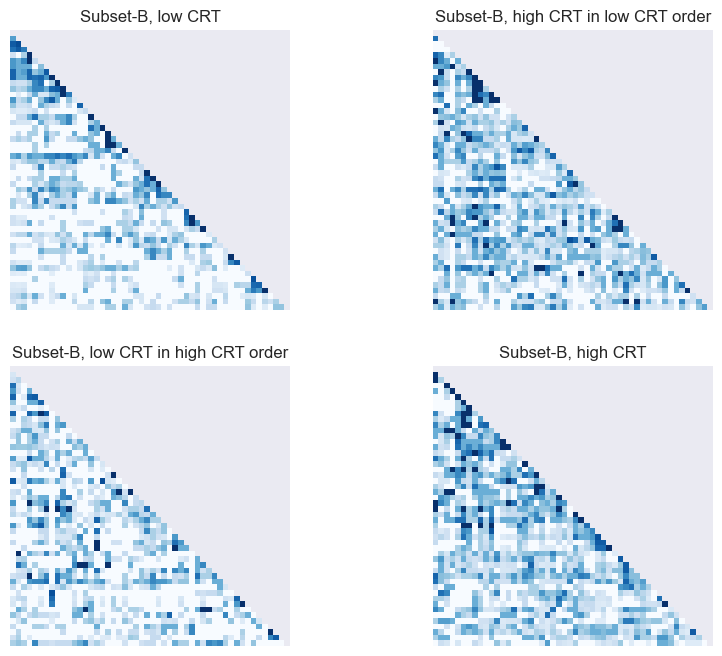

In [56]:
variant = 'B30'
data = respondents[respondents.variant == variant].sort_values('crt')
i1 = data.iloc[:13].respondent.values
i3 = data.iloc[27:].respondent.values

g1 = respondents[(respondents.variant == variant) & (respondents.respondent.isin(i1))].respondent.values
g3 = respondents[(respondents.variant == variant) & (respondents.respondent.isin(i3))].respondent.values

m1 = makeMatrix('C-similarity', results[(results.respondent.isin(g1)) & (results.variant==variant)], cardsE if variant in ['E50', 'E30'] else cardsB, 40)
m2 = makeMatrix('C-similarity', results[(results.respondent.isin(g3)) & (results.variant==variant)], cardsE if variant in ['E50', 'E30'] else cardsB, 40, clusteredOrder=m1.index.values)
m4 = makeMatrix('C-similarity', results[(results.respondent.isin(g3)) & (results.variant==variant)], cardsE if variant in ['E50', 'E30'] else cardsB, 40)
m3 = makeMatrix('C-similarity', results[(results.respondent.isin(g1)) & (results.variant==variant)], cardsE if variant in ['E50', 'E30'] else cardsB, 40, clusteredOrder=m4.index.values)

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
ax = axes.ravel()
sns.heatmap(m1, mask=np.triu(np.ones_like(m1, dtype=bool)), vmin=0, vmax=100, cmap='Blues', xticklabels=[], yticklabels=[], cbar=False, square=True, ax=ax[0])
sns.heatmap(m2, mask=np.triu(np.ones_like(m2, dtype=bool)), vmin=0, vmax=100, cmap='Blues', xticklabels=[], yticklabels=[], cbar=False, square=True, ax=ax[1])
sns.heatmap(m3, mask=np.triu(np.ones_like(m3, dtype=bool)), vmin=0, vmax=100, cmap='Blues', xticklabels=[], yticklabels=[], cbar=False, square=True, ax=ax[2])
sns.heatmap(m4, mask=np.triu(np.ones_like(m4, dtype=bool)), vmin=0, vmax=100, cmap='Blues', xticklabels=[], yticklabels=[], cbar=False, square=True, ax=ax[3])

ax[0].set_title('Subset-B, low CRT')
ax[1].set_title('Subset-B, high CRT in low CRT order')
ax[2].set_title('Subset-B, low CRT in high CRT order')
ax[3].set_title('Subset-B, high CRT')


## Big5 and CRT variants comparision

### 20 vs 20

In [131]:
res = pd.DataFrame()

for variant in ['E', 'B']:
    for measure in ['bfExtra', 'bfAgree', 'bfConsc', 'bfNegEmo', 'bfOpenMind', 'crt']:
        i1 = respondents[respondents.variant==variant+'50'].sort_values(measure)[:20].respondent.values
        i2 = respondents[respondents.variant==variant+'50'].sort_values(measure)[20:].respondent.values
        i3 = respondents[respondents.variant==variant+'30'].sort_values(measure)[:20].respondent.values
        i4 = respondents[respondents.variant==variant+'30'].sort_values(measure)[20:].respondent.values
        tmp1 = my_mann(['time', 'categories', 'crt', 'labelClarity', 'sortDifficulty', 'concentration', 'timeAmount', 'cardQuantity',
            'bfExtra', 'bfAgree', 'bfConsc', 'bfNegEmo', 'bfOpenMind', 'informativeness'],
            respondents[(respondents.variant==variant+'50') & (respondents.respondent.isin(i1))],
            respondents[(respondents.variant==variant+'30') & (respondents.respondent.isin(i3))]
        )
        tmp2 = my_mann(['time', 'categories', 'crt', 'labelClarity', 'sortDifficulty', 'concentration', 'timeAmount', 'cardQuantity',
            'bfExtra', 'bfAgree', 'bfConsc', 'bfNegEmo', 'bfOpenMind', 'informativeness'],
            respondents[(respondents.variant==variant+'50') & (respondents.respondent.isin(i2))],
            respondents[(respondents.variant==variant+'30') & (respondents.respondent.isin(i4))]
        )
        tmp1['group'] = 'low'
        tmp2['group'] = 'high'
        tmp = pd.concat([tmp1, tmp2])
        tmp['variant'] = variant
        tmp['measure'] = measure
        res = pd.concat([res, tmp])

HTML(pd.DataFrame(res).to_html())

,feature,stat,p,p<.001,n1,n2,z,effsize,m1,m2,s1,s2,med1,med2,q125,q225,q175,q275,group,variant,measure
0,time,264.5,0.083401,,20,20,1.744731,0.275866,674.950000,593.150000,226.295214,363.521848,636.500000,514.000000,515.750000,385.000000,824.750000,783.750000,low,E,bfExtra
1,categories,222.5,0.546323,,20,20,0.608627,0.096232,6.450000,6.350000,2.163696,2.796144,6.500000,6.000000,5.000000,4.000000,7.000000,7.250000,low,E,bfExtra
2,crt,216.5,0.653338,,20,20,0.446326,0.070570,1.550000,1.400000,1.145931,1.273206,1.000000,1.000000,1.000000,0.000000,3.000000,3.000000,low,E,bfExtra
3,labelClarity,213.5,0.677166,,20,20,0.365176,0.057739,4.650000,4.500000,0.489360,0.760886,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,low,E,bfExtra
4,sortDifficulty,184.0,0.659863,,20,20,-0.432801,-0.068432,3.750000,3.800000,0.716350,1.196486,4.000000,4.000000,3.000000,3.000000,4.000000,5.000000,low,E,bfExtra
5,concentration,169.0,0.338486,,20,20,-0.838553,-0.132587,4.350000,4.550000,0.812728,0.825578,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,low,E,bfExtra
6,timeAmount,209.5,0.737922,,20,20,0.256976,0.040631,2.900000,2.850000,0.447214,0.489360,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,low,E,bfExtra
7,cardQuantity,200.0,1.000000,,20,20,0.000000,0.000000,2.950000,3.000000,0.510418,0.794719,3.000000,3.000000,3.000000,2.750000,3.000000,3.000000,low,E,bfExtra
8,bfExtra,258.0,0.111609,,20,20,1.568905,0.248066,6.750000,5.850000,1.712954,1.182103,6.500000,6.000000,5.750000,5.000000,8.000000,7.000000,low,E,bfExtra
9,bfAgree,225.0,0.500157,,20,20,0.676252,0.106925,10.850000,10.600000,2.007224,2.010499,11.500000,10.500000,9.750000,9.000000,12.000000,12.000000,low,E,bfExtra


### 13 vs 13

In [132]:
res = pd.DataFrame()

for variant in ['E', 'B']:
    for measure in ['bfExtra', 'bfAgree', 'bfConsc', 'bfNegEmo', 'bfOpenMind', 'crt']:
        i1 = respondents[respondents.variant==variant+'50'].sort_values(measure)[:13].respondent.values
        i2 = respondents[respondents.variant==variant+'50'].sort_values(measure)[27:].respondent.values
        i3 = respondents[respondents.variant==variant+'30'].sort_values(measure)[:13].respondent.values
        i4 = respondents[respondents.variant==variant+'30'].sort_values(measure)[27:].respondent.values
        tmp1 = my_mann(['time', 'categories', 'crt', 'labelClarity', 'sortDifficulty', 'concentration', 'timeAmount', 'cardQuantity',
            'bfExtra', 'bfAgree', 'bfConsc', 'bfNegEmo', 'bfOpenMind', 'informativeness'],
            respondents[(respondents.variant==variant+'50') & (respondents.respondent.isin(i1))],
            respondents[(respondents.variant==variant+'30') & (respondents.respondent.isin(i3))]
        )
        tmp2 = my_mann(['time', 'categories', 'crt', 'labelClarity', 'sortDifficulty', 'concentration', 'timeAmount', 'cardQuantity',
            'bfExtra', 'bfAgree', 'bfConsc', 'bfNegEmo', 'bfOpenMind', 'informativeness'],
            respondents[(respondents.variant==variant+'50') & (respondents.respondent.isin(i2))],
            respondents[(respondents.variant==variant+'30') & (respondents.respondent.isin(i4))]
        )
        tmp1['group'] = 'low'
        tmp2['group'] = 'high'
        tmp = pd.concat([tmp1, tmp2])
        tmp['variant'] = variant
        tmp['measure'] = measure
        res = pd.concat([res, tmp])

HTML(pd.DataFrame(res).to_html())

,feature,stat,p,p<.001,n1,n2,z,effsize,m1,m2,s1,s2,med1,med2,q125,q225,q175,q275,group,variant,measure
0,time,107.0,0.259233,,13,13,1.153846,0.226288,629.076923,531.769231,218.973918,232.608095,572.000000,486.000000,491.000000,355.000000,773.000000,783.000000,low,E,bfExtra
1,categories,88.5,0.855286,,13,13,0.205128,0.040229,6.461538,6.846154,1.853617,3.262058,7.000000,6.000000,5.000000,4.000000,7.000000,9.000000,low,E,bfExtra
2,crt,111.5,0.157533,,13,13,1.384615,0.271545,1.923077,1.230769,1.037749,1.363442,2.000000,1.000000,1.000000,0.000000,3.000000,3.000000,low,E,bfExtra
3,labelClarity,97.5,0.447157,,13,13,0.666667,0.130744,4.692308,4.538462,0.480384,0.518875,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,low,E,bfExtra
4,sortDifficulty,87.5,0.891189,,13,13,0.153846,0.030172,4.000000,3.769231,0.577350,1.235168,4.000000,4.000000,4.000000,3.000000,4.000000,5.000000,low,E,bfExtra
5,concentration,86.5,0.923963,,13,13,0.102564,0.020114,4.692308,4.615385,0.480384,0.650444,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,low,E,bfExtra
6,timeAmount,97.5,0.306627,,13,13,0.666667,0.130744,3.000000,2.846154,0.000000,0.554700,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,low,E,bfExtra
7,cardQuantity,101.0,0.354703,,13,13,0.846154,0.165944,3.000000,2.769231,0.577350,0.725011,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,low,E,bfExtra
8,bfExtra,104.0,0.300735,,13,13,1.000000,0.196116,5.769231,5.230769,1.165751,1.012739,6.000000,6.000000,5.000000,5.000000,6.000000,6.000000,low,E,bfExtra
9,bfAgree,79.5,0.813864,,13,13,-0.256410,-0.050286,10.307692,10.615385,2.213015,1.804553,10.000000,11.000000,9.000000,9.000000,12.000000,12.000000,low,E,bfExtra


In [137]:
res = []

for variant in ['E', 'B']:
    for measure in ['bfExtra', 'bfAgree', 'bfConsc', 'bfNegEmo', 'bfOpenMind', 'crt']:

        i1 = respondents[respondents.variant==variant+'50'].sort_values(measure)[:13].respondent.values
        i2 = respondents[respondents.variant==variant+'50'].sort_values(measure)[27:].respondent.values
        i3 = respondents[respondents.variant==variant+'30'].sort_values(measure)[:13].respondent.values
        i4 = respondents[respondents.variant==variant+'30'].sort_values(measure)[27:].respondent.values

        g1 = respondents[(respondents.variant == variant+'50') & (respondents.respondent.isin(i1))].respondent.values
        g2 = respondents[(respondents.variant == variant+'50') & (respondents.respondent.isin(i2))].respondent.values
        g3 = respondents[(respondents.variant == variant+'30') & (respondents.respondent.isin(i3))].respondent.values
        g4 = respondents[(respondents.variant == variant+'30') & (respondents.respondent.isin(i4))].respondent.values
        
        m1 = np.matrix(makeMatrix('similarity', results[(results.respondent.isin(g1)) & (results.variant==variant+'50')], cardsE if variant == 'E' else cardsB, 13))
        m2 = np.matrix(makeMatrix('similarity', results[(results.respondent.isin(g2)) & (results.variant==variant+'50')], cardsE if variant == 'E' else cardsB, 13))
        m3 = np.matrix(makeMatrix('similarity', results[(results.respondent.isin(g3)) & (results.variant==variant+'30')], cardsE if variant == 'E' else cardsB, 13))
        m4 = np.matrix(makeMatrix('similarity', results[(results.respondent.isin(g4)) & (results.variant==variant+'30')], cardsE if variant == 'E' else cardsB, 13))

        cor, p, n = mantel(m1, m3)
        cor2, p2 = spearmanr(np.array(m1.flatten())[0], np.array(m3.flatten())[0])
        res.append({
            'variant': variant, 'correlation':cor, 'p':p, 'n': n, 'cor2': cor2, 'p2': p2, 'n1': len(g1), 'n2': len(g3), 'group': 'low', 'measure': measure
        })
        
        cor, p, n = mantel(m2, m4)
        cor2, p2 = spearmanr(np.array(m2.flatten())[0], np.array(m4.flatten())[0])
        res.append({
            'variant': variant, 'correlation':cor, 'p':p, 'n': n, 'cor2': cor2, 'p2': p2, 'n1': len(g1), 'n2': len(g3), 'group': 'high', 'measure': measure
        })
        
pd.DataFrame(res)

,variant,correlation,p,n,cor2,p2,n1,n2,group,measure
0,E,0.788993,0.001,50,0.774846,0.000000e+00,13,13,low,bfExtra
1,E,0.800198,0.001,50,0.751383,0.000000e+00,13,13,high,bfExtra
2,E,0.852614,0.001,50,0.751741,0.000000e+00,13,13,low,bfAgree
3,E,0.800990,0.001,50,0.789033,0.000000e+00,13,13,high,bfAgree
4,E,0.783235,0.001,50,0.727680,0.000000e+00,13,13,low,bfConsc
5,E,0.819213,0.001,50,0.769228,0.000000e+00,13,13,high,bfConsc
6,E,0.834593,0.001,50,0.784634,0.000000e+00,13,13,low,bfNegEmo
7,E,0.759201,0.001,50,0.734707,0.000000e+00,13,13,high,bfNegEmo
8,E,0.827803,0.001,50,0.747439,0.000000e+00,13,13,low,bfOpenMind
9,E,0.769172,0.001,50,0.756974,0.000000e+00,13,13,high,bfOpenMind
